# D214 Capstone
# Modeling Inflation Adusted Recessionary Lumber Prices
# COVID 19 Recession
## Eric Yarger

# Section C: Data Preparation

# Import Packages

In [1]:
# Import Initial Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import statsmodels
import datetime
import platform
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
from scipy import signal
from pmdarima.arima import StepwiseContext
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split

### Environment

In [2]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter environment version
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : not installed
jupyter_client   : 7.3.5
jupyter_core     : 4.10.0
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.1.1


In [3]:
# Python Version
print(platform.python_version())

3.7.13


In [4]:
#Load Medical Dataset 
df = pd.read_csv('C:/Users/ericy/Desktop/lumber_trading_days_adj.csv')

# Data Selection for Analysis

In [5]:
#------ Select Data Set for Recession
df = df[11359:11941]

In [6]:
df

,Date,Trading Days,2022_Value,Value
11359,2018-01-10,11360,511.3770,460.70
11360,2018-01-11,11361,514.8180,463.80
11361,2018-01-12,11362,517.3710,466.10
11362,2018-01-16,11363,526.9170,474.70
11363,2018-01-17,11364,528.8040,476.40
...,...,...,...,...
11936,2020-04-27,11937,333.0096,314.16
11937,2020-04-28,11938,343.0372,323.62
11938,2020-04-29,11939,333.5396,314.66
11939,2020-04-30,11940,340.4932,321.22


# D1: Exploratory Data Analysis

## Select columns 'Trading Days' and '2022_Value' for time series modeling

In [7]:
df = df[['Trading Days','2022_Value']]

In [8]:
df

,Trading Days,2022_Value
11359,11360,511.3770
11360,11361,514.8180
11361,11362,517.3710
11362,11363,526.9170
11363,11364,528.8040
...,...,...
11936,11937,333.0096
11937,11938,343.0372
11938,11939,333.5396
11939,11940,340.4932


In [9]:
df.head()

,Trading Days,2022_Value
11359,11360,511.377
11360,11361,514.818
11361,11362,517.371
11362,11363,526.917
11363,11364,528.804


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 11359 to 11940
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trading Days  582 non-null    int64  
 1   2022_Value    582 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.2 KB


## Explore shape and descriptive statistics of dataset

In [11]:
df.shape

(582, 2)

In [12]:
df.describe()

,Trading Days,2022_Value
count,582.000000,582.000000
mean,11650.500000,445.868714
std,168.153204,91.041451
min,11360.000000,275.388000
25%,11505.250000,377.255250
50%,11650.500000,422.064000
75%,11795.750000,493.478250
max,11941.000000,709.290000


In [13]:
df.isnull().any()

Trading Days    False
2022_Value      False
dtype: bool

## Line Graph Visualization

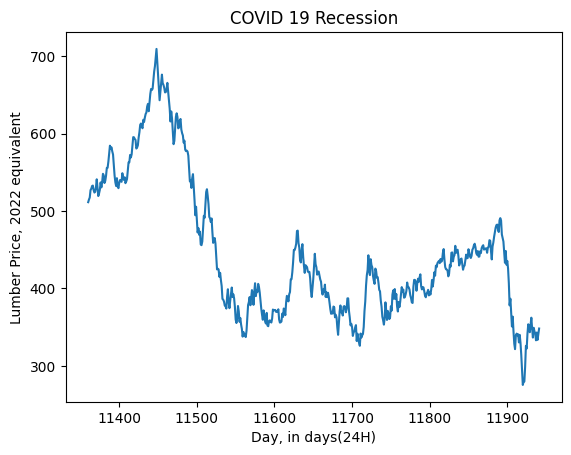

In [14]:
#-------
plt.plot(df['Trading Days'],df['2022_Value'])
plt.title('COVID 19 Recession')
plt.xlabel('Day, in days(24H)')
plt.ylabel('Lumber Price, 2022 equivalent')
plt.show()

## Drop any null values, if there are any

In [15]:
# Drop any null columns
df = df.dropna()

# D2: Time Step Formatting, Indexing


### Set df['Trading Days'] to Index

In [16]:
# Day to datetime
df['Trading Days'] = pd.to_datetime(df['Trading Days'], unit='D')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 11359 to 11940
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Trading Days  582 non-null    datetime64[ns]
 1   2022_Value    582 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.6 KB


In [18]:
# Set Day as Index
df.set_index('Trading Days',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 582 entries, 2001-02-07 to 2002-09-11
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2022_Value  582 non-null    float64
dtypes: float64(1)
memory usage: 9.1 KB


In [20]:
df

,2022_Value
Trading Days,
2001-02-07,511.3770
2001-02-08,514.8180
2001-02-09,517.3710
2001-02-10,526.9170
2001-02-11,528.8040
...,...
2002-09-07,333.0096
2002-09-08,343.0372
2002-09-09,333.5396


# D3: Stationarity Analysis


### Augmented Dickey Fuller (ADF) Test
### Assess stationarity of dataset

In [21]:
# Code Reference (Making time series stationary | Python, n.d.)
dicky_fuller_test = adfuller(df)

In [22]:
dicky_fuller_test

(-1.364878377211528,
 0.5989933044250826,
 1,
 580,
 {'1%': -3.4416749612171467,
  '5%': -2.8665360672844318,
  '10%': -2.5694307639714626},
 4110.914790353596)

In [23]:
# Results show p = .55864
# Data does not reject null hypothesis at p < .05
# Therefore, Time series is determined to be non-stationary

# D4 Differencing

## 1st and 2nd order Differencing
### finding 'd' for ARIMA model

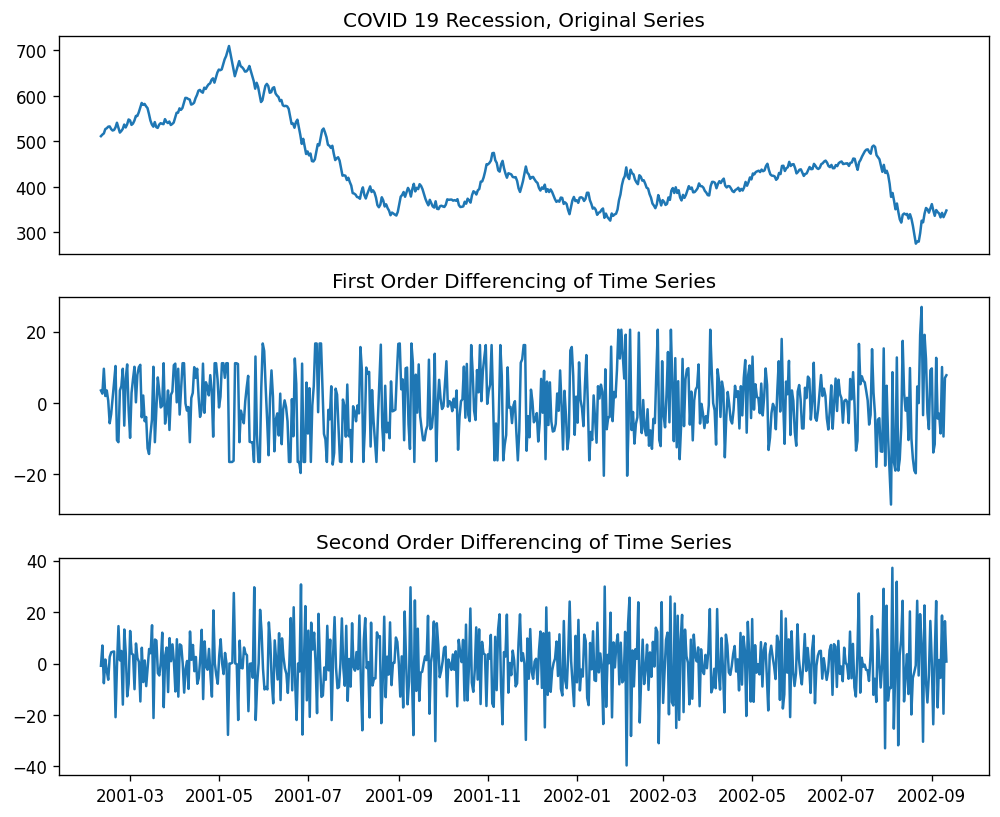

In [24]:
# Set plot parameters for multi-ax subplots
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})
 
# Establish that there are three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plot the original dataset 
ax1.plot(df); ax1.set_title('COVID 19 Recession, Original Series'); ax1.axes.xaxis.set_visible(False)

# First Order differencing of Time Series 
ax2.plot(df.diff()); ax2.set_title('First Order Differencing of Time Series'); ax2.axes.xaxis.set_visible(False)

# Second Order Differencing of Time Series
ax3.plot(df.diff().diff()); ax3.set_title('Second Order Differencing of Time Series')

# Plot all three graphs
plt.show()

In [25]:
# Using pmdarima's ndiffs to find differencing term
# Code reference (Verma, 2021)

kpss_diffs = ndiffs(df, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


# D5: Seasonality Analysis

In [26]:
# Code Reference (Boston, 2020)
result = seasonal_decompose(df)

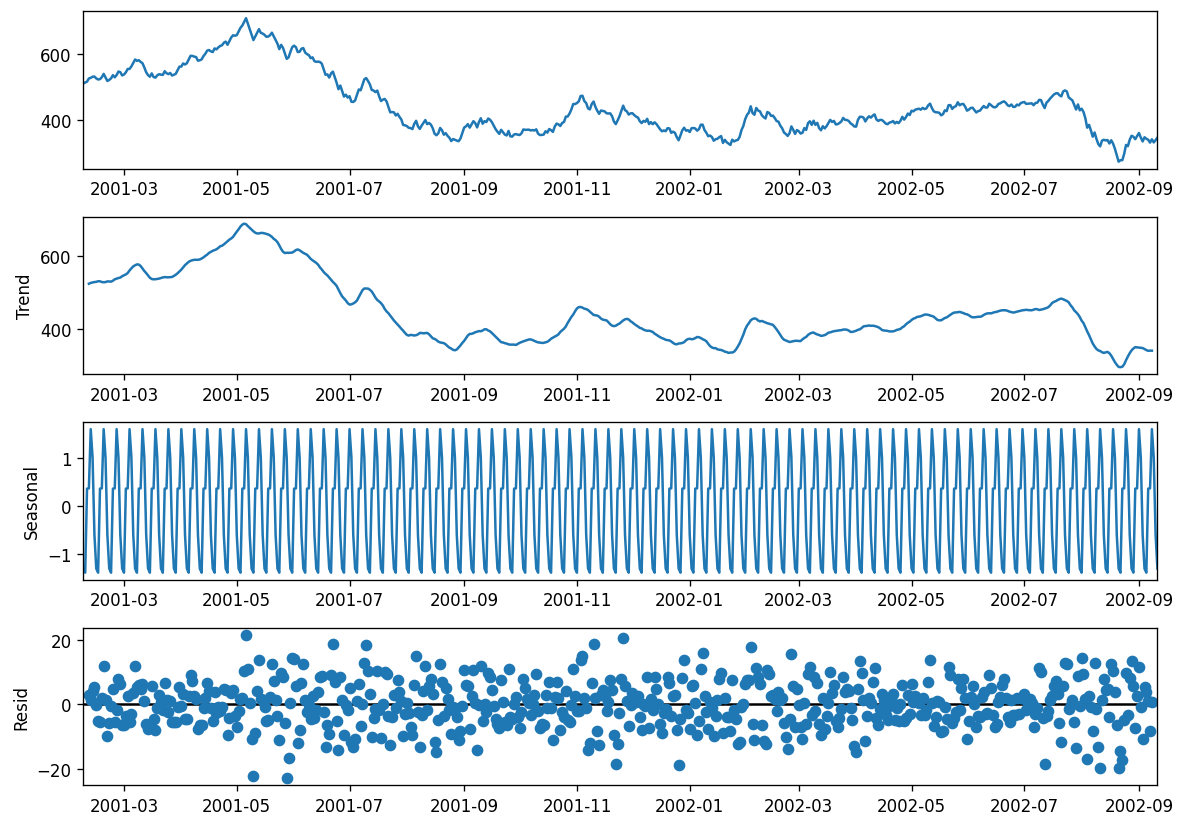

In [27]:
# plotting the result of our seasonal decomposition from the step above
rcParams['figure.figsize'] = 10,7
result.plot();

# D6 ACF and PACF

## Finding order of MA term 'q'
### Using Autocorrelation function (ACF)

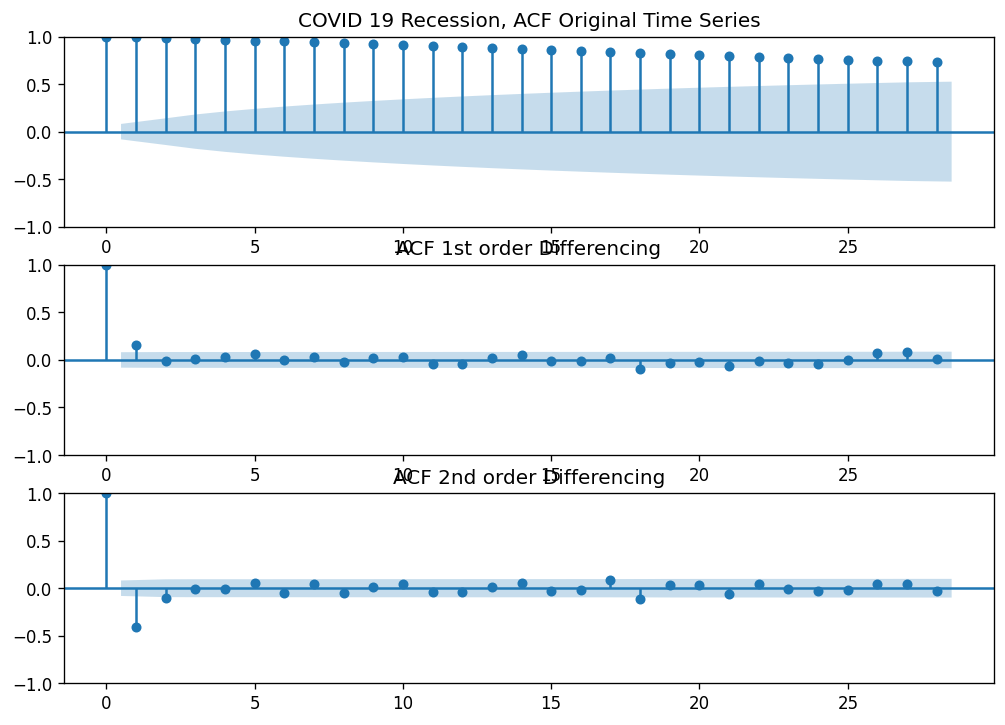

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df, ax=ax1, title='COVID 19 Recession, ACF Original Time Series');
plot_acf(df.diff().dropna(), ax=ax2, title='ACF 1st order Differencing');
plot_acf(df.diff().diff().dropna(), ax=ax3, title='ACF 2nd order Differencing');

## Finding order of AR term 'p'
### Using Partial autocorrelation (PACF)

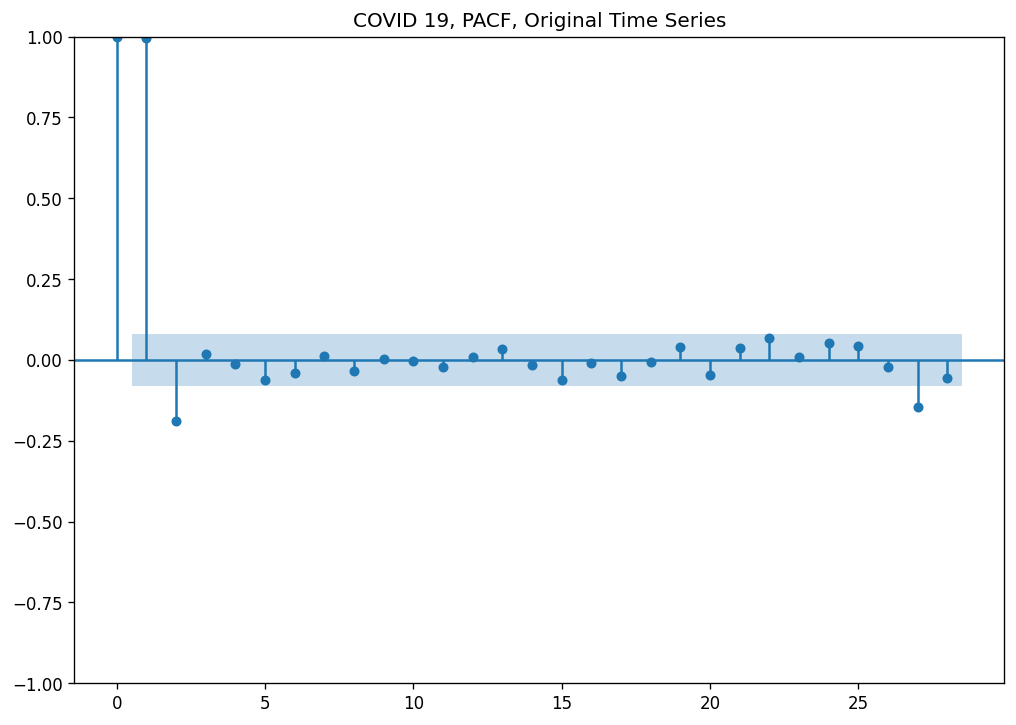

In [29]:
warnings.filterwarnings("ignore")
plot_pacf(df.dropna(), title='COVID 19, PACF, Original Time Series');

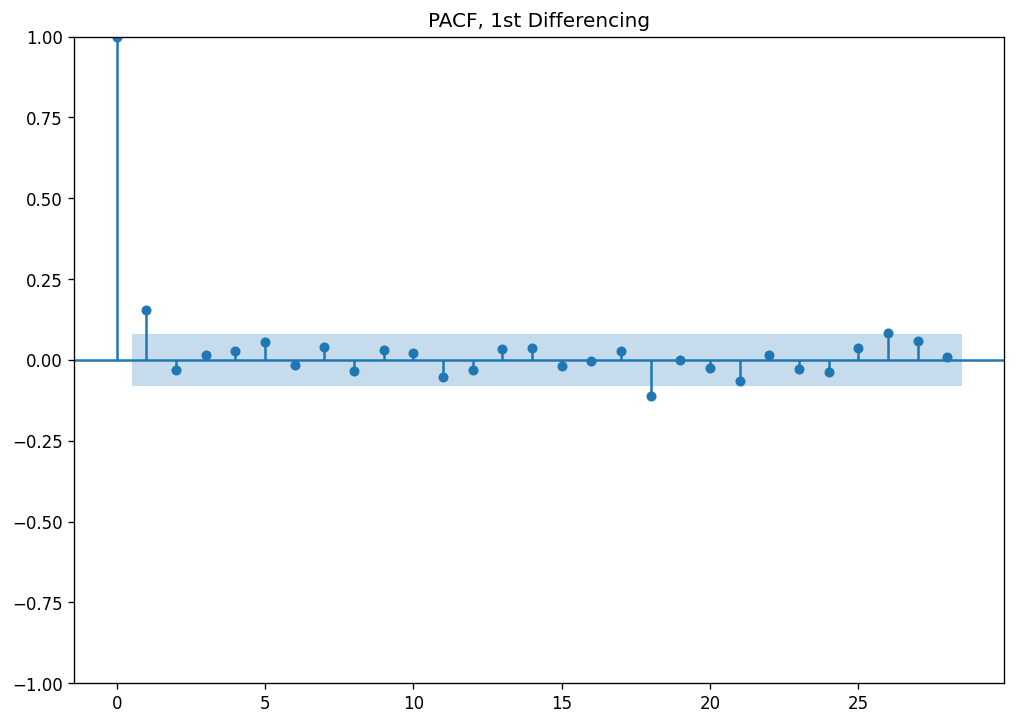

In [30]:
plot_pacf(df.diff().dropna(), title='PACF, 1st Differencing');

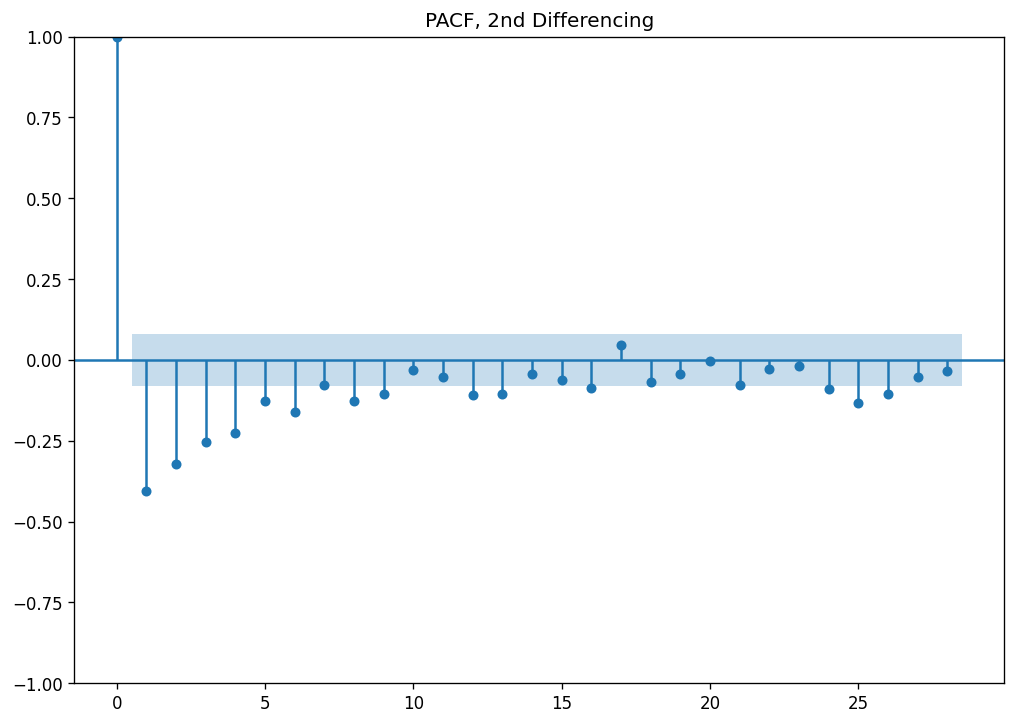

In [31]:
plot_pacf(df.diff().diff().dropna(), title='PACF, 2nd Differencing');

# D7 Spectral Density

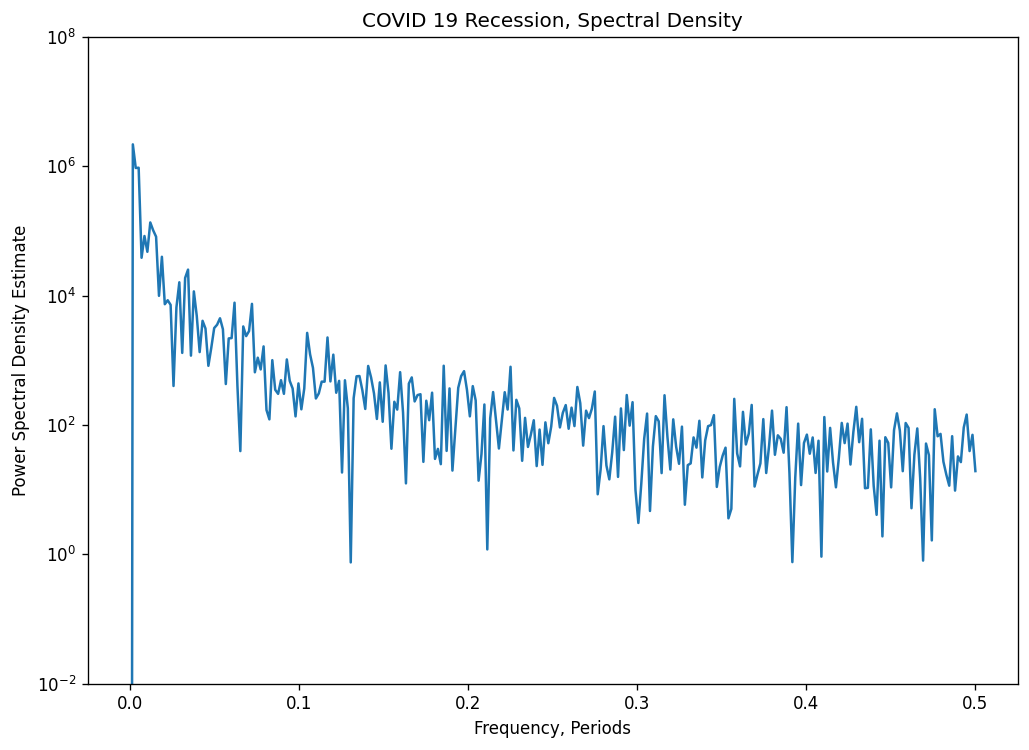

In [32]:
# Code Reference (Festus, 2022)

# signal periodogram
f, Pxx_den = signal.periodogram(df['2022_Value'])

# plotting semilogy - pyplot module used to make a plot with log scaling on the y-axis
plt.semilogy(f, Pxx_den)

# Setting coordinate values and titles for Spectral Density Graph
# setting y-axis min and max value
plt.ylim(1e-2, 1e8)

# Graph Title
plt.title('COVID 19 Recession, Spectral Density')

# X label for Periods
plt.xlabel('Frequency, Periods')

# Y Label for SD Estimate
plt.ylabel('Power Spectral Density Estimate')
plt.show()

# D8 Create Train/Test Datasets

## Dataset Size = 582 cases
## 80/20 Train/Test Split
## Split is 465 / 113

In [33]:
# ------Splitting data into Test and Train sets using pmdarima's train_test_split
# code reference (Smith, 2019)

train, test = train_test_split(df, train_size=469)

In [34]:
train

,2022_Value
Trading Days,
2001-02-07,511.377
2001-02-08,514.818
2001-02-09,517.371
2001-02-10,526.917
2001-02-11,528.804
...,...
2002-05-17,415.584
2002-05-18,418.932
2002-05-19,430.596


In [35]:
test

,2022_Value
Trading Days,
2002-05-22,446.4720
2002-05-23,434.9160
2002-05-24,440.8560
2002-05-25,443.2320
2002-05-26,455.0040
...,...
2002-09-07,333.0096
2002-09-08,343.0372
2002-09-09,333.5396


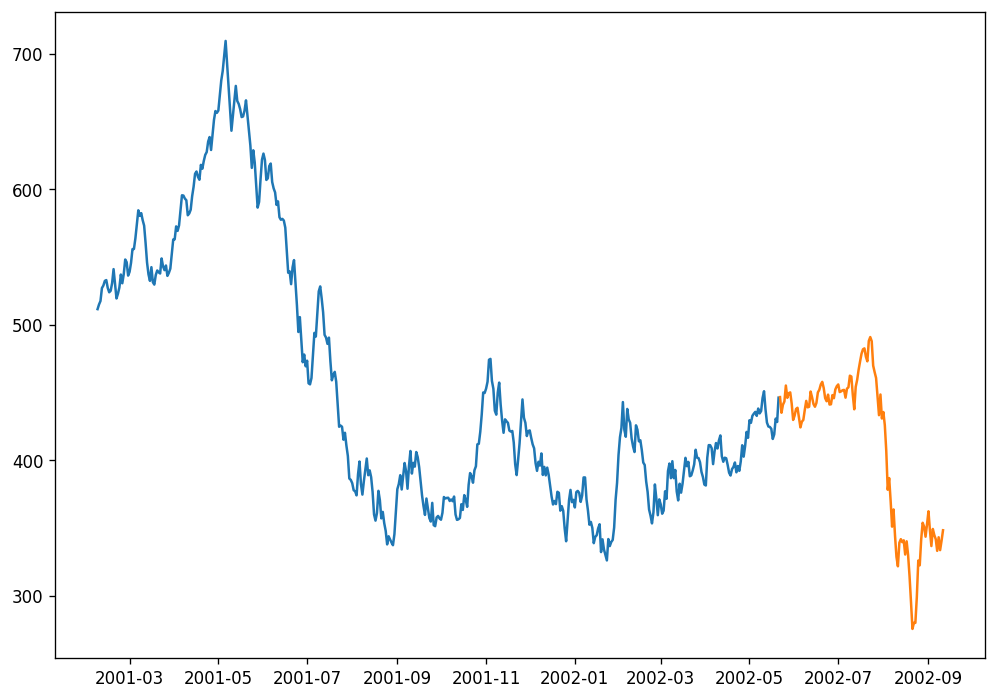

In [36]:
# Plot training data
plt.plot(train)

# Plot Test Data
plt.plot(test)

In [37]:
print(train.shape)
print(test.shape)

(469, 1)
(113, 1)


# D9 Auto-arima ARIMA Modeling
## Using pmdarima's auto_arima

In [38]:
# Fit the model using auto_arima
# Auto-arima code reference (6. Tips to using auto_arima — pmdarima 2.0.1 documentation, n.d.)
# Additional code reference (Pmdarima.arima.AutoARIMA — pmdarima 2.0.1 documentation, n.d.)
# Auto-arima, initial parameter attempt
# Code Reference (Kosaka, 2021)

# Establish auto_arima to run ARIMA and take into account
# Any Seasonality of the data, and any trends found.
model = auto_arima(train, start_p=1, start_q=1,
                   test='adf',
                   max_p=3,
                   max_q=3,
                   max_d=3,
                   seasonal=True,
                   stationarity=False,
                   seasonal_test='ocsb',
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                  trend='c')

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3404.640, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3414.796, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3403.209, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3402.640, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3414.796, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3404.639, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3406.622, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3402.640, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.893 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  469
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1698.320
Date:                Tue, 18 Oct 2022   AIC                           3402.640
Time:                        13:37:4

In [67]:
model = auto_arima(train, trace=True)

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3406.963, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3414.796, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3403.209, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3402.640, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3412.903, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3404.640, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3404.639, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3406.622, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3400.710, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3402.710, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3402.710, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3401.274, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3404.706, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.708 seconds
                      

In [40]:
model.conf_int()

,0,1
ma.L1,0.087989,0.264524
sigma2,70.074198,96.110677


# Visualizing Model Results

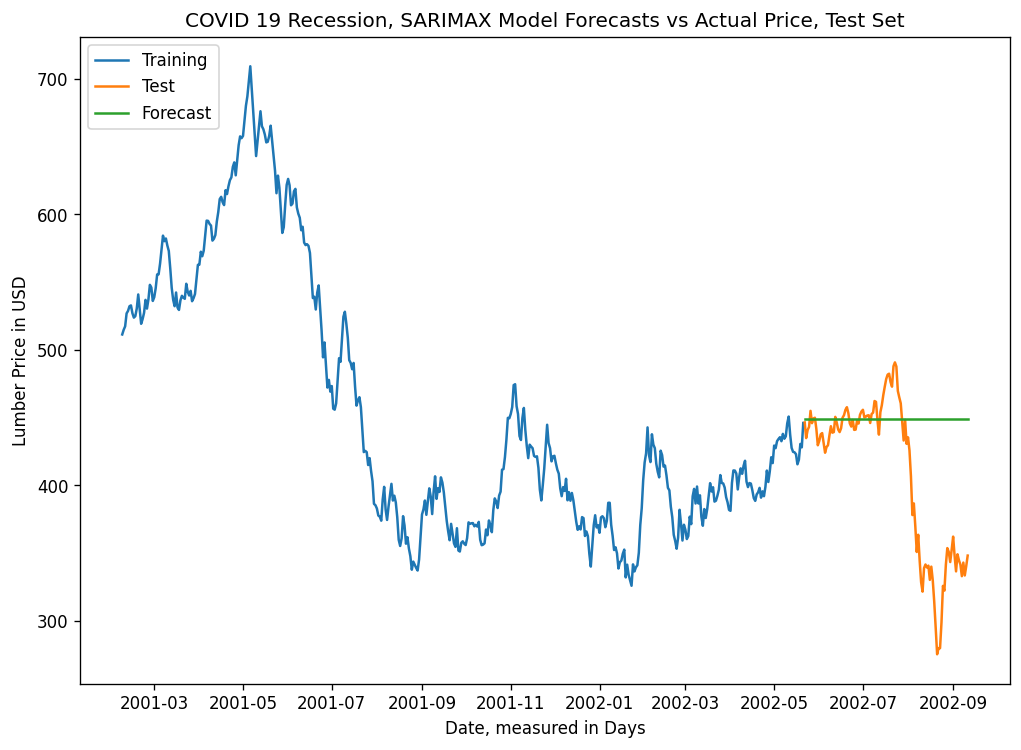

In [41]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# ------Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 113))

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date, measured in Days')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('COVID 19 Recession, SARIMAX Model Forecasts vs Actual Price, Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')

# Show Plot
plt.show()

In [42]:
forecast

,forecast_prices
2002-05-22,449.336511
2002-05-23,449.336511
2002-05-24,449.336511
2002-05-25,449.336511
2002-05-26,449.336511
...,...
2002-09-07,449.336511
2002-09-08,449.336511
2002-09-09,449.336511
2002-09-10,449.336511


# D10 Accuracy Metrics for our forecast

In [43]:
# RMSE and MAE to test model accuracy

In [44]:
# Create array of actual Revenue values, stored in Test variable

test_array = test[['2022_Value']].to_numpy()
#test_array

In [45]:
test_array.shape

(113, 1)

In [46]:
forecast

,forecast_prices
2002-05-22,449.336511
2002-05-23,449.336511
2002-05-24,449.336511
2002-05-25,449.336511
2002-05-26,449.336511
...,...
2002-09-07,449.336511
2002-09-08,449.336511
2002-09-09,449.336511
2002-09-10,449.336511


In [47]:
# Predictions to numpy array
predicted_array = forecast[['forecast_prices']].to_numpy()

In [48]:
predicted_array.shape

(113, 1)

In [49]:
#RMSE Calculation

rmse = sqrt(mean_squared_error(test_array, predicted_array))
print ('RMSE = ' + str(rmse))

RMSE = 69.06287127867498


In [50]:
# MAE Calculation

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_array
predicted = predicted_array

print(mae(true, predicted))

46.66414833292884


# D11 Visualizing Model Forecast Confidence Intervals at 20% CI

In [51]:
# Model Standard Error calculations, computed numerical Hessian

std_error = model.bse()
print(std_error)

ma.L1     0.045035
sigma2    6.642081
dtype: float64


In [52]:
# Generate Model confidence intervals

conf_int = model.conf_int()

In [53]:
# ------Generate Forecast Prediction Intervals at 90% Confidence

y_forec, conf_int = model.predict(113, return_conf_int=True, alpha=0.8)
print(conf_int)

[[447.02712386 451.64589761]
 [445.77108374 452.90193773]
 [444.85418193 453.81883954]
 [444.09530158 454.57771989]
 [443.43318325 455.23983822]
 [442.83818193 455.83483954]
 [442.29326722 456.37975425]
 [441.78758491 456.88543656]
 [441.31371303 457.35930844]
 [440.86631092 457.80671055]
 [440.4413836  458.23163787]
 [440.03585007 458.6371714 ]
 [439.64727492 459.02574655]
 [439.27369341 459.39932806]
 [438.9134932  459.75952827]
 [438.56533177 460.1076897 ]
 [438.22807708 460.44494439]
 [437.90076414 460.77225733]
 [437.58256237 461.0904591 ]
 [437.27275079 461.40027068]
 [436.97069876 461.70232272]
 [436.67585089 461.99717059]
 [436.38771505 462.28530642]
 [436.10585271 462.56716876]
 [435.82987112 462.84315035]
 [435.55941687 463.1136046 ]
 [435.29417057 463.3788509 ]
 [435.03384248 463.63917899]
 [434.77816876 463.89485272]
 [434.52690834 464.14611313]
 [434.27984029 464.39318119]
 [434.03676149 464.63625998]
 [433.79748474 464.87553673]
 [433.56183702 465.11118445]
 [433.32965806

In [54]:
# Assign Predictions to pandas DataFrame

conf_pd = pd.DataFrame(conf_int, columns =['Low_Prediction','High_Prediction'])

#Assign Low predictions to variable
low_prediction = conf_pd['Low_Prediction']

#Assign High predictions to variable
high_prediction = conf_pd['High_Prediction']

In [55]:
# Read out Test and Train sets to csv file
# Open csv files in Google Sheets, Add Day Column
# Dates align with 'test' variable, which contains actual revenue figures

low_prediction.to_csv('C:/Users/ericy/Desktop/Low_Prediction.csv')
high_prediction.to_csv('C:/Users/ericy/Desktop/High_Prediction.csv')

In [56]:
#-----Load predictions, date column added

low_pred = pd.read_csv('C:/Users/ericy/Desktop/COVID_Low_Prediction.csv')
high_pred = pd.read_csv('C:/Users/ericy/Desktop/COVID_High_Prediction.csv')

In [57]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
low_pred

,Date,Low_Prediction
0,2002-05-22,447.002736
1,2002-05-23,445.734959
2,2002-05-24,444.809458
3,2002-05-25,444.043453
4,2002-05-26,443.375114
...,...,...
108,2002-09-07,420.743182
109,2002-09-08,420.611998
110,2002-09-09,420.481410
111,2002-09-10,420.351410


In [58]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
high_pred

,Date,High_Prediction
0,2002-05-22,451.665468
1,2002-05-23,452.933246
2,2002-05-24,453.858746
3,2002-05-25,454.624752
4,2002-05-26,455.293091
...,...,...
108,2002-09-07,477.925023
109,2002-09-08,478.056207
110,2002-09-09,478.186795
111,2002-09-10,478.316794


## Convert Low and High Prediction 'Day' column to datetime and index

In [59]:
# Lower Predictions, Set Day as Index
low_pred['Date'] = pd.to_datetime(low_pred['Date'])

In [60]:
low_pred.set_index('Date',inplace=True)

In [61]:
# High Predictions, Day to datetime
high_pred['Date'] = pd.to_datetime(high_pred['Date'])

In [62]:
# High Predictions, Set Day as Index
high_pred.set_index('Date',inplace=True)

In [63]:
low_pred

,Low_Prediction
Date,
2002-05-22,447.002736
2002-05-23,445.734959
2002-05-24,444.809458
2002-05-25,444.043453
2002-05-26,443.375114
...,...
2002-09-07,420.743182
2002-09-08,420.611998
2002-09-09,420.481410


In [64]:
high_pred

,High_Prediction
Date,
2002-05-22,451.665468
2002-05-23,452.933246
2002-05-24,453.858746
2002-05-25,454.624752
2002-05-26,455.293091
...,...
2002-09-07,477.925023
2002-09-08,478.056207
2002-09-09,478.186795


# SARIMAX Model Forecast, With Confidence Interval = 20%, Vs Test Set

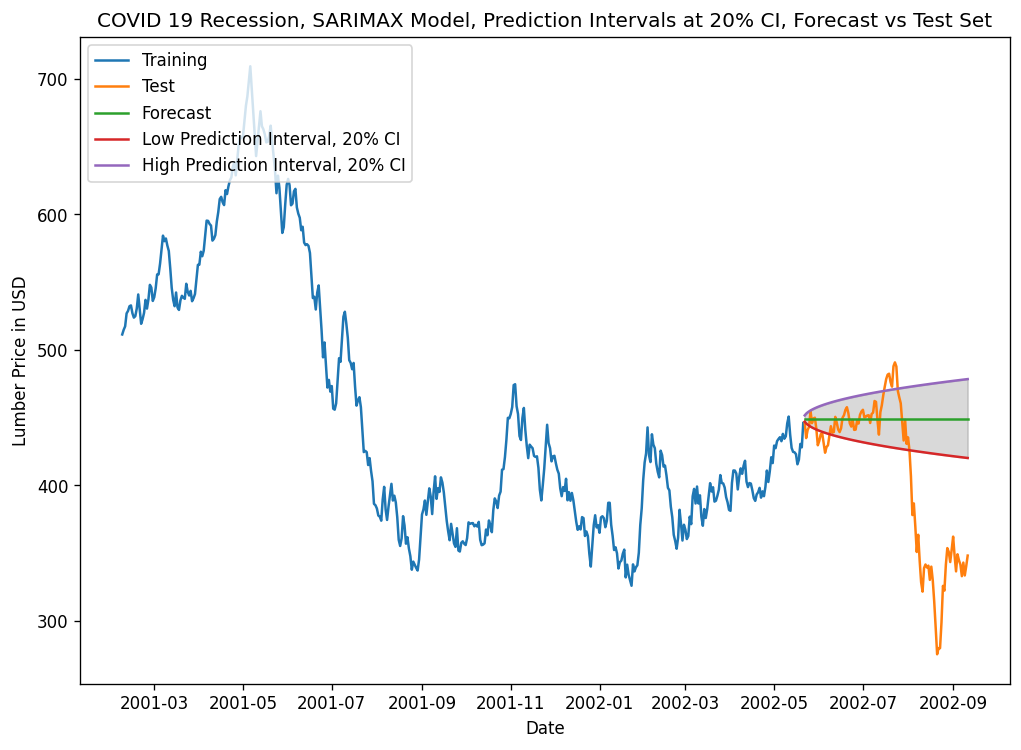

In [65]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# -----Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 113),index=test.index)

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('COVID 19 Recession, SARIMAX Model, Prediction Intervals at 20% CI, Forecast vs Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Add Prediction Interval at 95% CI
plt.plot(low_pred,label='Low Prediction Interval, 20% CI')
plt.plot(high_pred,label='High Prediction Interval, 20% CI')
plt.fill_between(low_pred.index, low_pred['Low_Prediction'], high_pred['High_Prediction'], color='k', alpha=.15)

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')


# Show Plot
plt.show()

# Is the null hypothesis Accepted or Rejected?

In [66]:
# Accept or reject the Null Hypothesis
# COVID Recession we Accept the Null Hypothesis